In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('/content/bottle_regression.csv', low_memory=False)

In [4]:
# https://www.kaggle.com/code/retroflake/predicting-salinity-using-mlr/input

Cst_Cnt - Автоматическая нумерация кастов - все касты последовательно нумеруются. 1 - первая сделанная станция

Btl_Cnt - Подсчет бутылок с автоматической нумерацией - все бутылки, когда-либо отобранные для пробы, последовательно пронумерованы

Sta_ID - Линия и станция CalCOFI

Depth_ID - [Century]-[YY][MM][ShipCode]-[CastType][Julian Day]-[CastTime]-[Line][Sta][Depth][Bottle]-[Rec_Ind]

Depthm - Глубина в метрах

T_degC - Температура воды в градусах Цельсия

Salnty - Соленость в г соли на кг воды (г/кг)

O2ml_L - O2 mixing ration in ml/L



In [3]:
df

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345575,13033,345576,090.0 037.0,19-6201HO-HY-030-0900-09000370-0000B-7,0,14.14,33.539,5.90,25.030,101.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345576,13033,345577,090.0 037.0,19-6201HO-HY-030-0900-09000370-0001A-3,1,14.14,33.539,5.90,25.030,101.0,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345577,13033,345578,090.0 037.0,19-6201HO-HY-030-0900-09000370-0010A-3,10,14.03,33.536,5.79,25.051,98.9,...,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
345578,13033,345579,090.0 037.0,19-6201HO-HY-030-0900-09000370-0020A-7,20,13.90,33.528,5.60,25.072,95.4,...,NaN,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864863 entries, 0 to 864862
Data columns (total 74 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Cst_Cnt              864863 non-null  int64  
 1   Btl_Cnt              864863 non-null  int64  
 2   Sta_ID               864863 non-null  object 
 3   Depth_ID             864863 non-null  object 
 4   Depthm               864863 non-null  int64  
 5   T_degC               853900 non-null  float64
 6   Salnty               817509 non-null  float64
 7   O2ml_L               696201 non-null  float64
 8   STheta               812174 non-null  float64
 9   O2Sat                661274 non-null  float64
 10  Oxy_µmol/Kg          661268 non-null  float64
 11  BtlNum               118667 non-null  float64
 12  RecInd               864863 non-null  int64  
 13  T_prec               853900 non-null  float64
 14  T_qual               23127 non-null   float64
 15  S_prec           

In [5]:
df.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
count,345580.000000,345580.000000,345580.000000,339386.000000,309810.000000,282199.000000,306842.000000,254453.000000,254453.000000,0.0,...,0.0,345579.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,6491.859205,172790.500000,266.082913,10.562634,33.927833,3.041771,25.893725,51.536609,133.795046,NaN,...,NaN,267.991163,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3905.670702,99760.497351,345.485068,4.584991,0.478610,2.103905,1.047805,37.568841,91.511639,NaN,...,NaN,349.010332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,1.440000,30.250000,0.000000,20.996000,0.000000,0.000000,NaN,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2873.750000,86395.750000,50.000000,7.180000,33.565000,0.810000,25.022000,12.500000,36.974850,NaN,...,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6683.000000,172790.500000,140.000000,9.790000,33.961000,2.920000,26.099000,46.300000,129.449000,NaN,...,NaN,141.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,9966.000000,259185.250000,370.000000,13.730000,34.310000,5.220000,26.743000,93.100000,228.331600,NaN,...,NaN,372.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,13033.000000,345580.000000,5165.000000,31.140000,36.330000,9.980000,28.083000,186.300000,435.179800,NaN,...,NaN,5264.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

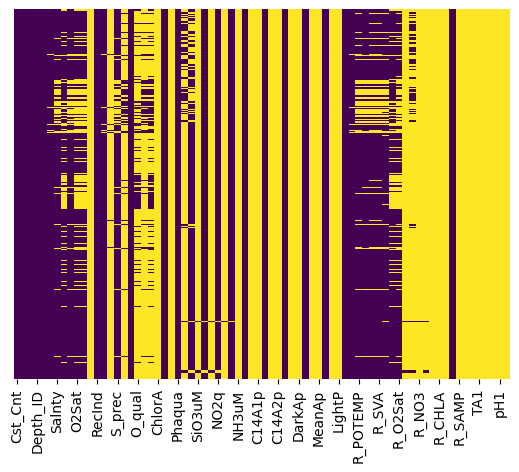

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
df.isnull().sum()

Cst_Cnt                     0
Btl_Cnt                     0
Sta_ID                      0
Depth_ID                    0
Depthm                      0
                        ...  
TA1                    862779
TA2                    864629
pH2                    864853
pH1                    864779
DIC Quality Comment    864808
Length: 74, dtype: int64

In [8]:
df.size - df.drop_duplicates().size # Дубликатов нет

0

In [11]:
for i in df.columns:
  print(i, df[i].unique().size)

Cst_Cnt 13033
Btl_Cnt 345580
Sta_ID 1161
Depth_ID 345580
Depthm 2466
T_degC 2777
Salnty 3106
O2ml_L 790
STheta 5538
O2Sat 1341
Oxy_µmol/Kg 198355
BtlNum 1
RecInd 2
T_prec 4
T_qual 3
S_prec 3
S_qual 3
P_qual 1
O_qual 3
SThtaq 3
O2Satq 3
ChlorA 1
Chlqua 1
Phaeop 1
Phaqua 1
PO4uM 397
PO4q 2
SiO3uM 518
SiO3qu 2
NO2uM 55
NO2q 2
NO3uM 94
NO3q 2
NH3uM 1
NH3q 1
C14As1 1
C14A1p 1
C14A1q 1
C14As2 1
C14A2p 1
C14A2q 1
DarkAs 1
DarkAp 1
DarkAq 1
MeanAs 1
MeanAp 1
MeanAq 1
IncTim 1
LightP 1
R_Depth 2466
R_TEMP 2777
R_POTEMP 2819
R_SALINITY 3107
R_SIGMA 626
R_SVA 5153
R_DYNHT 354
R_O2 790
R_O2Sat 1336
R_SIO3 518
R_PO4 397
R_NO3 94
R_NO2 55
R_NH4 1
R_CHLA 1
R_PHAEO 1
R_PRES 2555
R_SAMP 1
DIC1 1
DIC2 1
TA1 1
TA2 1
pH2 1
pH1 1
DIC Quality Comment 1


<Axes: >

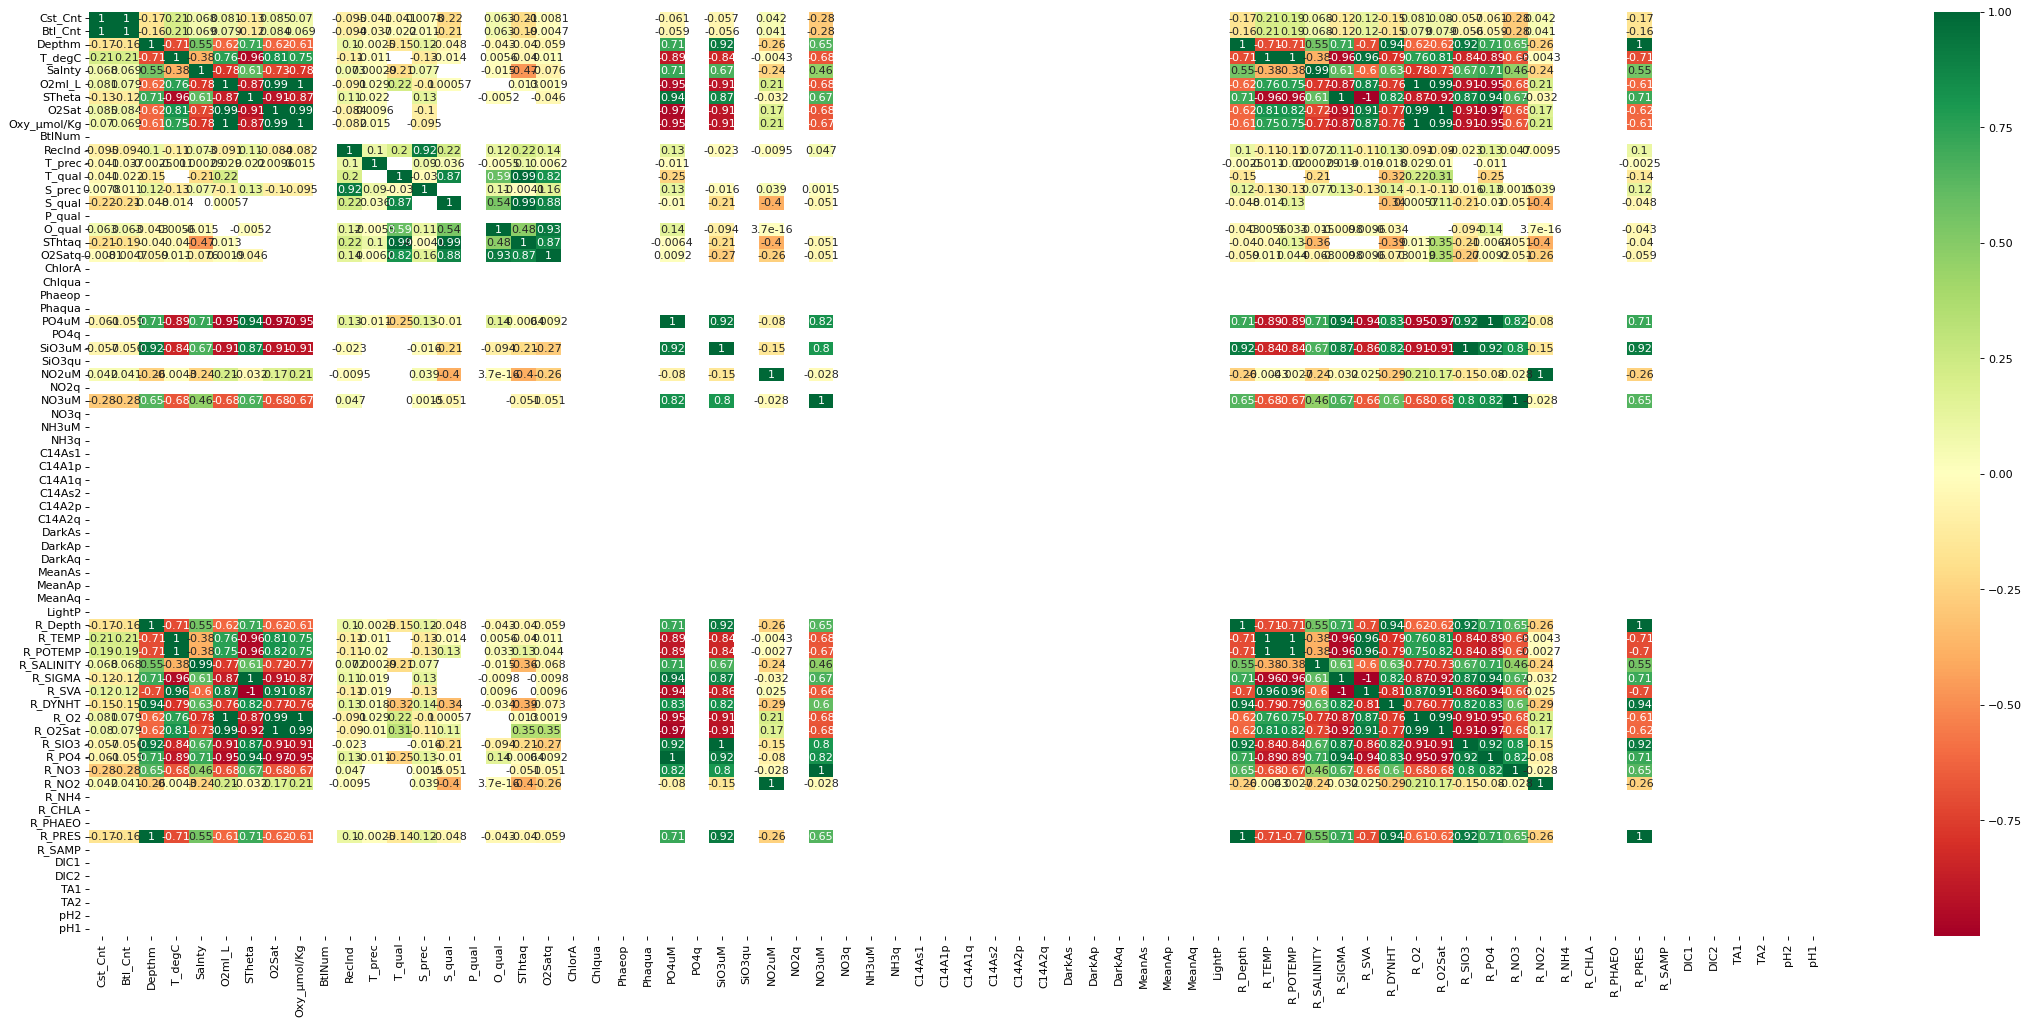

In [12]:
x = df.drop(columns=['Sta_ID', 'Depth_ID', 'IncTim', 'DIC Quality Comment'])

plt.figure(figsize=(35,15), dpi= 80)
sns.heatmap(x.corr(), xticklabels=x.corr().columns, yticklabels=x.corr().columns, cmap='RdYlGn', center=0, annot=True)

Text(0.5, 1.0, 'Зависимость температуры от глубины')

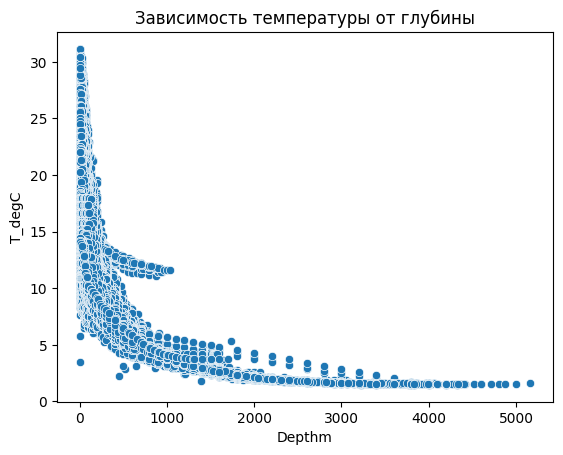

In [22]:
sns.scatterplot(x='Depthm', y='T_degC', data=df)
plt.title('Зависимость температуры от глубины')

Text(0.5, 1.0, 'Зависимость количества соли от глубины')

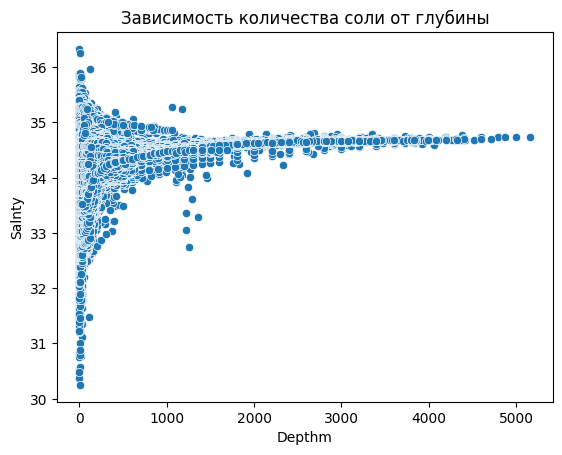

In [23]:
sns.scatterplot(x='Depthm', y='Salnty', data=df)
plt.title('Зависимость количества соли от глубины')

In [13]:
y = df['O2Satq']
X = df[['T_qual', 'O_qual']]

In [14]:
all_data = X
all_data['y'] = y

<ipython-input-14-524f39f7f54d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data['y'] = y


In [15]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345580 entries, 0 to 345579
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T_qual  6737 non-null   float64
 1   O_qual  64416 non-null  float64
 2   y       93243 non-null  float64
dtypes: float64(3)
memory usage: 7.9 MB


In [16]:
all_data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Index: 2613 entries, 134 to 341506
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T_qual  2613 non-null   float64
 1   O_qual  2613 non-null   float64
 2   y       2613 non-null   float64
dtypes: float64(3)
memory usage: 81.7 KB


In [17]:
all_data.dropna(inplace=True)

<ipython-input-17-abe3406c15d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_data.dropna(inplace=True)


In [18]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2613 entries, 134 to 341506
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T_qual  2613 non-null   float64
 1   O_qual  2613 non-null   float64
 2   y       2613 non-null   float64
dtypes: float64(3)
memory usage: 81.7 KB


In [19]:
X_train, X_test, y_train, y_test = train_test_split(all_data[['T_qual', 'O_qual']], all_data.y, test_size=0.2, random_state=42)

# Создаем и обучаем модель линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Делаем предсказания
y_pred = model.predict(X_test)

# Оцениваем модель
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.01
R² Score: 0.75
